**LAPTOP PRICE ANALYSIS**





# **Introduction**

The Laptop Price Dataset is a comprehensive collection of data related to laptop prices, specifications, and various factors that influence the pricing of laptops. This dataset provides valuable insights into the dynamics of the laptop market, making it a valuable resource for researchers, analysts, and businesses in the technology industry.

**Import all the liabraries -**

In [36]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

By read_csv() function we are reading the dataset present in "laptop_train.csv" file.

In [37]:
# load data and arrange into Pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/laptops_train.csv")

In [38]:
df.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  
0                      NaN  1.37kg  11912523.48  
1                      NaN  1.34kg   7993374.48  
2                      NaN  1.86kg   5112900.00  
3                      NaN  1.83kg  22563005.40  
4                      NaN  1.37kg  16037611.20

# **Performing Exploratory Data Analysis**
**Find information about data by using df.info()**

This laptops_train.csv dataset contains the information of patients health condition through their tests peroforms during covid19 with 977 rows and 13 columns.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [40]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [41]:
## Drop Unwanted Columns

df.drop("Operating System Version",axis=1,inplace=True)

In [42]:
## Change Datatype

df["Screen Size"] = df["Screen Size"].replace(r'[^0-9.]', '', regex=True)
df["RAM"] = df["RAM"].replace(r'[^0-9.]', '', regex=True)
df["Weight"] = df["Weight"].replace(r'[^0-9.]', '', regex=True)

In [43]:
df["Screen Size"]=df["Screen Size"].astype("float")
df["RAM"]=df["RAM"].astype("float")
df["Weight"]=df["Weight"].astype("float")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    object 
 2   Category          977 non-null    object 
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    object 
 5   CPU               977 non-null    object 
 6   RAM               977 non-null    float64
 7   Storage           977 non-null    object 
 8   GPU               977 non-null    object 
 9   Operating System  977 non-null    object 
 10  Weight            977 non-null    float64
 11  Price             977 non-null    float64
dtypes: float64(4), object(8)
memory usage: 91.7+ KB


In [45]:
## Divide the Data into Numeric and Categorical form

num_feature=df.select_dtypes(["int64","float64"])
cat_feature=df.select_dtypes(["object"]).columns

In [46]:
num_feature

Screen Size   RAM  Weight        Price
0           13.3   8.0    1.37  11912523.48
1           13.3   8.0    1.34   7993374.48
2           15.6   8.0    1.86   5112900.00
3           15.4  16.0    1.83  22563005.40
4           13.3   8.0    1.37  16037611.20
..           ...   ...     ...          ...
972         17.3  32.0    4.42  24897600.00
973         14.0   8.0    1.95  10492560.00
974         17.3  16.0    2.73  18227710.80
975         15.6   8.0    2.04   8705268.00
976         14.0   4.0    1.70   8909784.00

[977 rows x 4 columns]

In [47]:
cat_feature

Index(['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'Storage',
       'GPU', 'Operating System'],
      dtype='object')

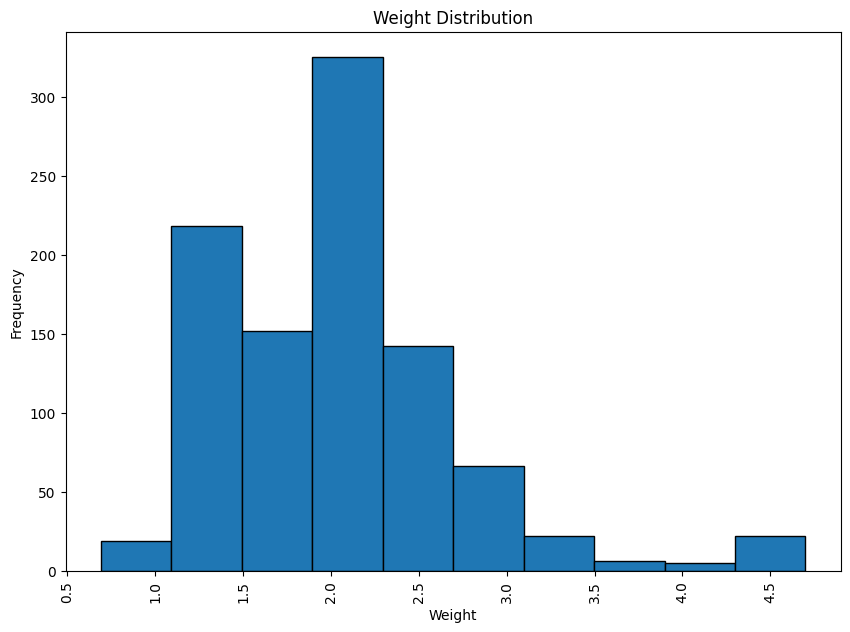

In [48]:
#### Histogram

plt.figure(figsize=(10, 7))
plt.hist(df["Weight"], bins=10, edgecolor="black")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Weight Distribution")
plt.xticks(rotation=90)
plt.show()

In [49]:
#### Pieplot

df["Category"].value_counts()

Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     85
Workstation            24
Netbook                17
Name: Category, dtype: int64

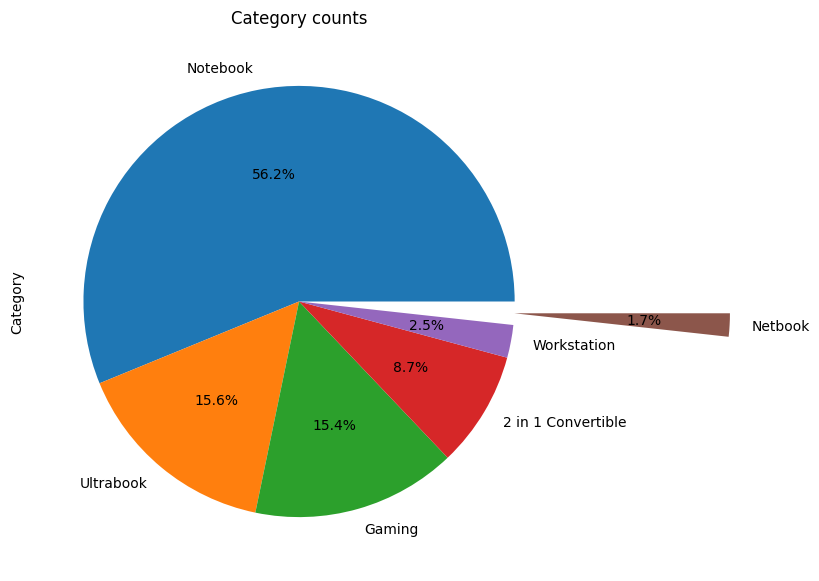

In [50]:
plt.figure(figsize=(7,7))
df["Category"].value_counts().plot.pie(autopct="%1.1f%%",explode=(0,0,0,0,0,1))
plt.title("Category counts")
plt.show()

In [51]:
#### Scatterplot

df.corr()

Screen Size       RAM    Weight     Price
Screen Size     1.000000  0.232315  0.822261  0.075152
RAM             0.232315  1.000000  0.390161  0.764005
Weight          0.822261  0.390161  1.000000  0.224415
Price           0.075152  0.764005  0.224415  1.000000

[]

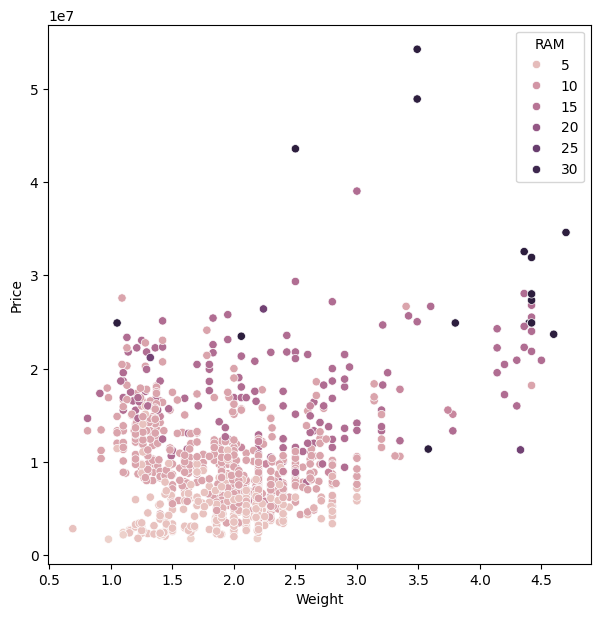

In [52]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="Weight",y="Price",hue="RAM")
plt.plot()

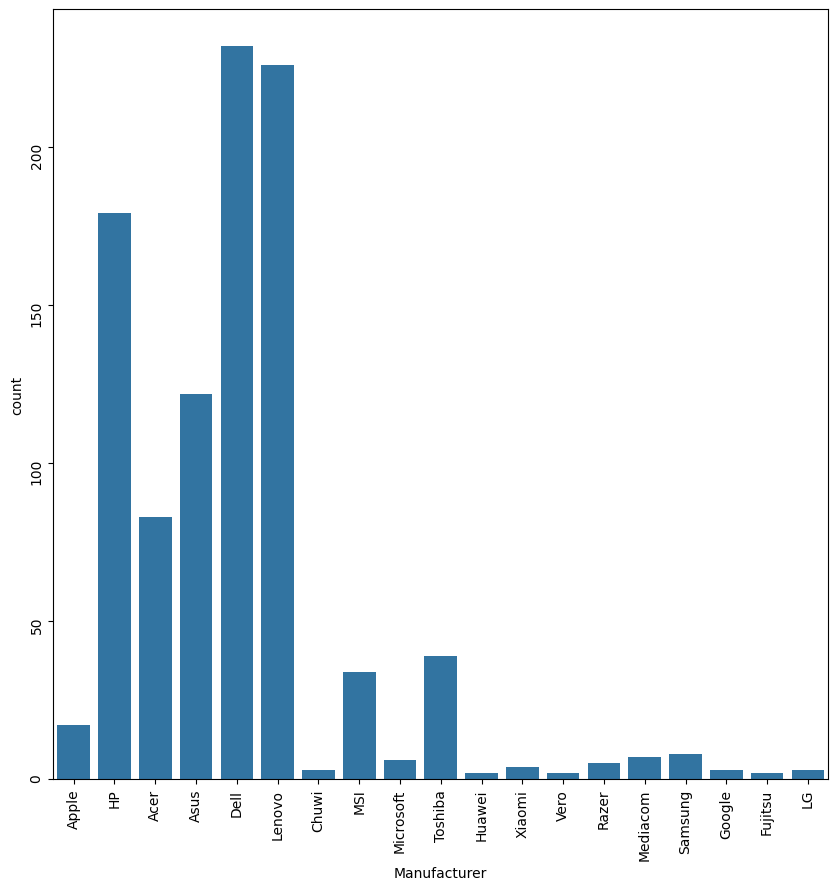

In [53]:
#### Countplot

plt.figure(figsize=(10,10))
sns.countplot(data=df,x="Manufacturer")
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

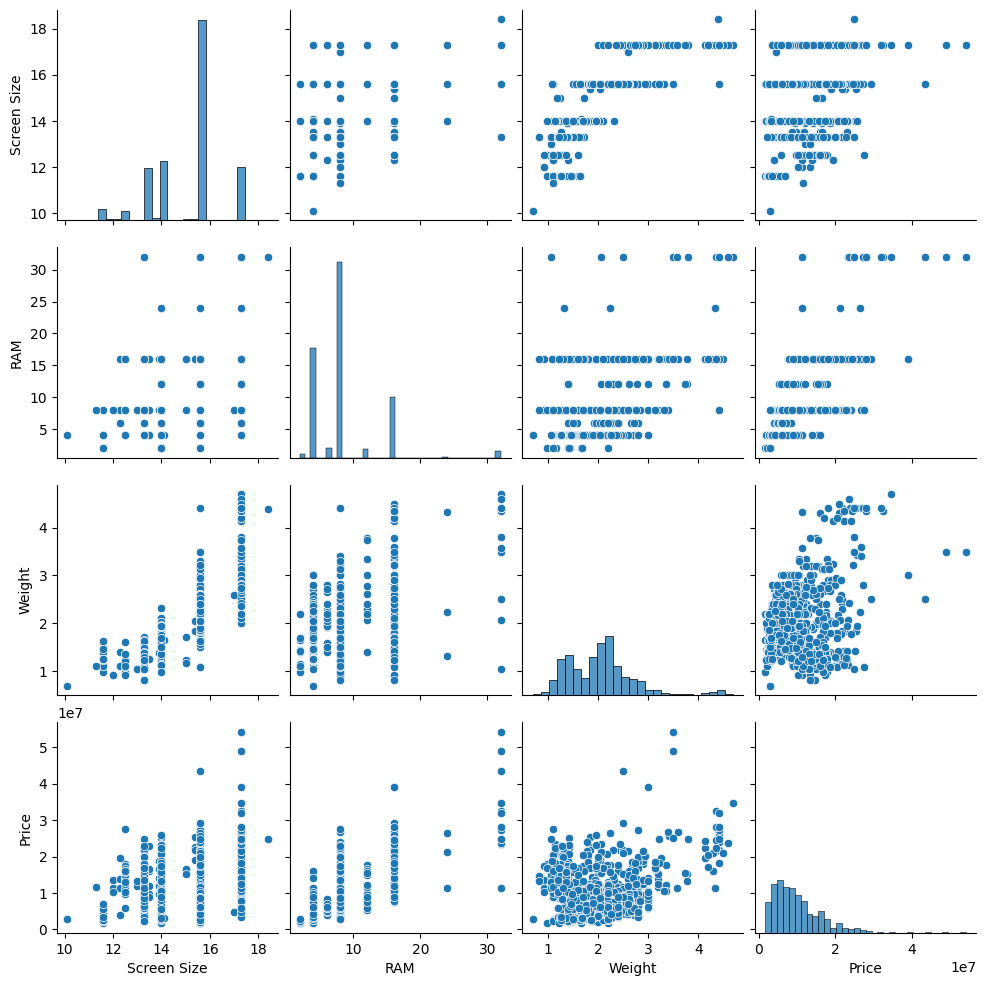

In [54]:
#### Find Relation between each other

sns.pairplot(df)

In [55]:
### Divide the Data into Numeric and Categorical form

num_feature=df.select_dtypes(["int64","float64"])
cat_feature=df.select_dtypes(["object"]).columns

In [56]:
num_feature

Screen Size   RAM  Weight        Price
0           13.3   8.0    1.37  11912523.48
1           13.3   8.0    1.34   7993374.48
2           15.6   8.0    1.86   5112900.00
3           15.4  16.0    1.83  22563005.40
4           13.3   8.0    1.37  16037611.20
..           ...   ...     ...          ...
972         17.3  32.0    4.42  24897600.00
973         14.0   8.0    1.95  10492560.00
974         17.3  16.0    2.73  18227710.80
975         15.6   8.0    2.04   8705268.00
976         14.0   4.0    1.70   8909784.00

[977 rows x 4 columns]

In [57]:
cat_feature

Index(['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'Storage',
       'GPU', 'Operating System'],
      dtype='object')

In [58]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[cat_feature]=oe.fit_transform(df[cat_feature])

In [59]:
#### Splitting Data Into Features and Target

x=df.iloc[:,:-1]
x

Manufacturer  Model Name  Category  Screen Size  Screen   CPU   RAM  \
0             1.0       236.0       4.0         13.3    23.0  58.0   8.0   
1             1.0       237.0       4.0         13.3     1.0  56.0   8.0   
2             7.0        38.0       3.0         15.6     8.0  67.0   8.0   
3             1.0       236.0       4.0         15.4    25.0  77.0  16.0   
4             1.0       236.0       4.0         13.3    23.0  60.0   8.0   
..            ...         ...       ...          ...     ...   ...   ...   
972           4.0        43.0       1.0         17.3     8.0  83.0  32.0   
973          16.0       339.0       3.0         14.0     8.0  61.0   8.0   
974           2.0       318.0       1.0         17.3     8.0  93.0  16.0   
975           7.0       293.0       3.0         15.6    15.0  68.0   8.0   
976          10.0       362.0       3.0         14.0     0.0  61.0   4.0   

     Storage   GPU  Operating System  Weight  
0        2.0  51.0               6.0    1.37  
1        0.0  45.0               6.0    1.34  
2       15.0  47.0               4.0    1.86  
3       27.0   7.0               6.0    1.83  
4       15.0  52.0               6.0    1.37  
..       ...   ...               ...     ...  
972     16.0  72.0               5.0    4.42  
973     15.0  41.0               5.0    1.95  
974     16.0  71.0               5.0    2.73  
975      3.0  62.0               5.0    2.04  
976     25.0  41.0               5.0    1.70  

[977 rows x 11 columns]

In [60]:
y=df["Price"]
y

0      11912523.48
1       7993374.48
2       5112900.00
3      22563005.40
4      16037611.20
          ...     
972    24897600.00
973    10492560.00
974    18227710.80
975     8705268.00
976     8909784.00
Name: Price, Length: 977, dtype: float64

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=sc.fit_transform(x)

In [64]:
 #from sklearn.preprocessing import MinMaxScaler
 #scaler= MinMaxScaler()
 #x=scaler.fit_transform(x)
 #y=scaler.fit_transform(y)

In [65]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

#x=sc.fit_transform(x)
#y=sc.fit_transform(y)

In [66]:
y

0      11912523.48
1       7993374.48
2       5112900.00
3      22563005.40
4      16037611.20
          ...     
972    24897600.00
973    10492560.00
974    18227710.80
975     8705268.00
976     8909784.00
Name: Price, Length: 977, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [68]:
xtrain

array([[-1.04843159, -0.25416055,  0.30849059, ...,  1.44279293,
         0.31975292,  0.97777215],
       [-0.5702254 , -1.47621895, -1.31191428, ...,  1.14701912,
         0.31975292,  3.57666359],
       [ 1.10349627, -0.74298391, -1.31191428, ...,  0.30899332,
         0.31975292,  3.54661861],
       ...,
       [ 0.86439318, -0.50597865,  0.30849059, ...,  1.59067984,
         0.31975292,  0.84256971],
       [-0.5702254 , -0.37266319,  0.30849059, ..., -1.16987575,
        -2.98023232,  0.48202985],
       [-0.5702254 , -0.33563111,  0.30849059, ..., -2.15578845,
         0.31975292,  1.14301958]])

In [69]:
xtest

array([[ 0.14708389, -1.51325102,  0.30849059, ..., -0.67691939,
        -0.78024216, -0.26909484],
       [ 1.10349627, -0.85408013, -1.31191428, ...,  0.94983658,
         0.31975292,  0.99279464],
       [ 0.86439318,  0.85680163,  0.30849059, ..., -0.38114558,
         0.31975292, -0.02873494],
       ...,
       [-0.3311223 , -0.06900019,  0.30849059, ..., -0.08537177,
         0.31975292,  0.24166995],
       [-1.04843159,  1.7085393 , -2.12211671, ..., -0.08537177,
         0.31975292, -1.15542198],
       [-0.5702254 ,  1.56781742,  0.30849059, ...,  0.90054094,
         0.31975292,  0.03135504]])

In [70]:
ytrain

228     7922772.00
758    25511059.08
177    24888708.00
677     4401540.00
60     11550708.00
          ...     
767     9772308.00
72      7736040.00
908     7015788.00
235     7993908.00
37      8705268.00
Name: Price, Length: 781, dtype: float64

In [71]:
ytest

932     2568898.80
724    11990684.16
525    11915280.00
6      19028613.24
248     6002100.00
          ...     
194     7460388.00
895    13115700.00
567     6571188.00
414     8251776.00
803    15552108.00
Name: Price, Length: 196, dtype: float64

In [73]:
import tensorflow as tf

In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=11, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


The model architecture consists of three hidden layers with 128, 128, and 64 neurons respectively, followed by an output layer with a single neuron. The ReLU activation function is used in the hidden layers to introduce non-linearity, and a linear activation function is used in the output layer since you're dealing with a regression problem.

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26369 (103.00 KB)
Trainable params: 26369 (103.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.huber,
    metrics=["mae"]
)

With this compile method, model is configured to use the Adam optimizer, Huber loss function, and to track Mean Absolute Error (MAE) as a metric during training and evaluation.

In [77]:
model.fit(xtrain,ytrain, epochs=100 ,batch_size=1,verbose=1)

Epoch 1/100
781/781 [==============================] - 8s 6ms/step - loss: 9353265.0000 - mae: 9353265.0000
Epoch 2/100
781/781 [==============================] - 3s 4ms/step - loss: 4151959.0000 - mae: 4151959.5000
Epoch 3/100
781/781 [==============================] - 3s 4ms/step - loss: 2539527.7500 - mae: 2539528.2500
Epoch 4/100
781/781 [==============================] - 2s 3ms/step - loss: 2413706.2500 - mae: 2413706.7500
Epoch 5/100
781/781 [==============================] - 3s 3ms/step - loss: 2355250.2500 - mae: 2355250.5000
Epoch 6/100
781/781 [==============================] - 3s 4ms/step - loss: 2324253.7500 - mae: 2324254.7500
Epoch 7/100
781/781 [==============================] - 2s 3ms/step - loss: 2297464.5000 - mae: 2297465.0000
Epoch 8/100
781/781 [==============================] - 2s 3ms/step - loss: 2277904.5000 - mae: 2277905.0000
Epoch 9/100
781/781 [==============================] - 2s 3ms/step - loss: 2268845.0000 - mae: 2268845.7500
Epoch 10/100
781/781 [======

This "fit" method call trains the model on the provided training data for 100 epochs, updating the weights after processing each sample individually, and displaying progress bars during training.

In [78]:
ypred=model.predict(xtest)

7/7 [==============================] - 0s 6ms/step


In [79]:
from sklearn.metrics import r2_score
r2_score(ypred,ytest)

0.6954560866327304